# Loi de Benford et l'ensenble des protéines reviewed d'UniProt

ce script a pour but de vérifier si la taille de l'ensemble des protéine reviewed d'UniProt suit la loi de Benford

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.stats import chisquare, distributions

In [4]:
data = pd.read_csv("uniprot-filtered-reviewed_yes_length.tab", sep = "\t" , index_col = 0)
data.head()

,Length
Entry,
P37256,31
Q1RHU4,540
Q46GQ4,237
Q4WAZ9,4007
P08938,196


In [5]:
data.describe()

,Length
count,563972.000000
mean,360.275409
std,336.277975
min,2.000000
25%,169.000000
50%,294.000000
75%,449.000000
max,35213.000000


## Distribution de la longueur des protéines reviewed d'uniprot

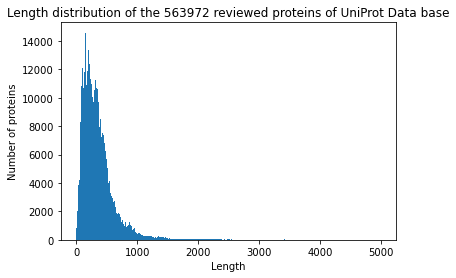

In [6]:
plt.hist(data["Length"], bins=range(0, 5000, 10))
plt.title(f"Length distribution of the {data.shape[0]} reviewed proteins of UniProt Data base")
plt.xlabel("Length")
plt.ylabel("Number of proteins");

In [7]:
data[data["Length"] > 5000].shape

(187, 1)

On remarque que 187 protéine sur 563972 on une taille > 5000.
## First digit de la taille des protéines

In [8]:
first_digit = np.zeros(9, dtype=int)
for x in data["Length"]:
    first = int(str(x)[0])
    if first == 0:
        continue
    first_digit[first-1] += 1
        
print(first_digit)
print(sum(first_digit))

[138823 115126 102784  71833  42357  30844  22444  21274  18487]
563972


### Normalisation

In [9]:
first_digit_norm = np.array(first_digit / sum(first_digit))

print(first_digit_norm)
print(sum(first_digit_norm))
print(first_digit)

[0.24615229 0.20413425 0.18225018 0.1273698  0.07510479 0.05469066
 0.0397963  0.03772173 0.03278   ]
0.9999999999999999
[138823 115126 102784  71833  42357  30844  22444  21274  18487]


## Loi de Benford : 

In [10]:
freq_benford = np.zeros(9, dtype=float)
for i in range(9):
    freq_benford[i] = (math.log((1+(1/(i+1))), 10))
print(freq_benford)
sum(freq_benford)

[0.30103    0.17609126 0.12493874 0.09691001 0.07918125 0.06694679
 0.05799195 0.05115252 0.04575749]


0.9999999999999999

## Barplot de la fréquence des first digit de la loi de Banford et de la taille de l'ensemble des protéines reviewed d'UniProt

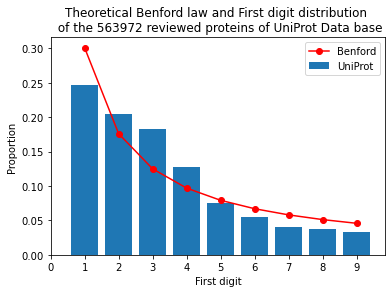

In [11]:
plt.plot(range(1,10), freq_benford, marker="o", color="red")
plt.bar(range(1,10), first_digit_norm)
plt.xticks(ticks=range(0,10))
plt.title(label=f"Theoretical Benford law and First digit distribution \n of the {data.shape[0]} reviewed proteins of UniProt Data base")
plt.xlabel("First digit")
plt.ylabel("Proportion")
plt.legend(labels = ("Benford", "UniProt"));

# Test du Statistique

V.A. : nombre de first digit  

Hopothèse :  
    - H0 : La distribution des $1^{er}$ digits de la taille des protéines du protéome Humain suit la loi de Benford.  
    - H1 : La distribution des $1^{er}$ digits de la taille des protéines du protéome Humain ne suit pas la loi de Benford.  
    
Conditionde validité : les effectifs calculés > 5  

Règle de décision (test $\chi²$):  
    -Si, $\chi²_{cal} > \chi²_{\alpha, (k-1)ddl}$, le test est significatif à $\alpha$% et on rejette H0.  

## Test du $\chi²$
## détermination de $F_{theo}$ et $F_{obs}$

In [13]:
# dictionnaire de la distribution théorique
first_digit_theo = {}
for key in first_digit:
    first_digit_theo[key] = freq_benford[key] * data.shape[0]

F_theo = [ int(freq_benford[key]*data.shape[0]) for key in sorted(freq_benford) ]
print(f"Le dictionnaire de la distribution théorique des first digits est : {first_digit_theo}\n")
print(f"La liste triées par ordre croissant des first digits des valeurs théoriques est : {F_theo}\n")

F_obs = [ first_digit[key] for key in sorted(first_digit) ]
print(f"Le dictionnaire de la distribution observé des first digits est : {first_digit}\n")
print(f"La liste triées par ordre croissant des first digits des valeurs observés est : {F_obs}\n")

Le dictionnaire de la distribution théorique des first digits est : {3: 70461.94916245612, 5: 44656.00569597106, 2: 99310.53955215066, 4: 54654.53385617959, 1: 169772.48871460676, 7: 32705.83432089994, 9: 25805.94346648508, 6: 37756.1148415562, 8: 28848.590389694516}

La liste triées par ordre croissant des first digits des valeurs théoriques est : [169772, 99310, 70461, 54654, 44656, 37756, 32705, 28848, 25805]

Le dictionnaire de la distribution observé des first digits est : {3: 102784, 5: 42357, 2: 115126, 4: 71833, 1: 138823, 7: 22444, 9: 18487, 6: 30844, 8: 21274}

La liste triées par ordre croissant des first digits des valeurs observés est : [138823, 115126, 102784, 71833, 42357, 30844, 22444, 21274, 18487]



### test du $\chi^2$ sur les distribution observé et théorique

In [14]:
chi2 = chisquare(F_obs, f_exp = F_theo)
print(chi2)
print(f"\nLa p-value est de  : {chi2[1]}\n")

Power_divergenceResult(statistic=37055.14917836648, pvalue=0.0)

La p-value est de  : 0.0



In [12]:
chi2 = chisquare([ first_digit_norm[key] for key in sorted(first_digit_norm) ], [ freq_benford[key] for key in sorted(freq_benford) ])
print(chi2)
print(f"\nLa p-value est de  : {chi2[1]}\n")

Power_divergenceResult(statistic=0.0657033956558796, pvalue=0.9999999527270779)

La p-value est de  : 0.9999999527270779



# discussion des résultats obtenus précédement

Les différent tests statistique testés plus jusqu'ici ne fonctionne pas dans le cas des grand échantillons (environ > 1000) ou ne sont pas applicables dans notre situation. c'est pour cette raison que l'on développe une procédure ressemblant à un bootstrap récupérant le $\chi^2$ calculés et renvoyant la moyennes des $\chi^2$ calculé durant la procédure. La p-value de ce $\chi^2$ est calculé par la suite.

# procédure "bootstrap"
## Fonction First digit

In [12]:
def First_digit(np_array):
    fd = np.zeros(9, dtype=int)
    for x in range(len(np_array)):
        first = int(str(np_array[x])[0])
        fd[first-1] += 1
    return fd

## Fonction de moyenne des $\chi^2$

In [13]:
def meanChi2(data, nb_val, nb_loop):
    sumChi2 = np.zeros(nb_loop, dtype=float)
    f_theo = np.array(freq_benford * nb_val)
    for i in range(nb_loop):
        ech = np.random.choice(data, size=nb_val, replace=False)
        f_obs = First_digit(ech)
        sumChi2[i] = chisquare(f_obs, f_theo)[0]
    return (sum(sumChi2) / nb_loop)

## Fonction principale de la procédure "bootstrap"

In [14]:
def bootstrap_Benford(data, nb_val, nb_loop):
    k = len(freq_benford+1)
    mean_chi2 = meanChi2(data, nb_val, nb_loop)
    p_val = distributions.chi2.sf(mean_chi2, k - 1)
    return p_val

In [17]:
bootstrap_Benford(data["Length"], 1000, 1000)

1.2516600592004783e-12

In [18]:
bootstrap_Benford(data["Length"], 1000, 1000)

1.1920351032335908e-12

## conclusion

La procédure mise en place ("bootstrap") permet de montrer, por un rique alpha de 5%, que les données expérimentale d'abondances de protéines ne suivent pas ici la loi de Benford. Puisque la p-value obtenu est inférieur à 5%, on rejette l'hypothése $H_0$, donc la distribution théorique ne suit pas la loi Benford.